#  ¿Cómo se mueve un péndulo? 


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

Referencias: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html

**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="http://images.iop.org/objects/ccr/cern/51/3/17/CCast2_03_11.jpg" width="400px" height="100px" />
 </div>

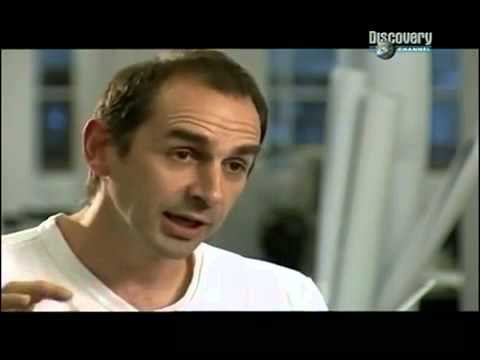

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema ` masa-resorte` y el `péndulo simple`. 

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="150px" height="50px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="200px" height="100px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

___
## Sistema `masa-resorte`

La solución a este sistema `masa-resorte` se explica en términos de la segunda ley de Newton. Para este caso, si la masa permanece constante y solo consideramos la dirección en $x$. Entonces,
\begin{equation}
F = m \frac{d^2x}{dt^2}.
\end{equation}

¿Cuál es la fuerza? **Ley de Hooke!**
\begin{equation}
F = -k x, \quad k > 0.
\end{equation}

Vemos que la fuerza se opone al desplazamiento y su intensidad es proporcional al mismo.  Y $k$ es la constante elástica o recuperadora del resorte. 

Entonces, un modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

### **¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
w0 = 1
def x(t):
    A = 0.5
    B = 0.1
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def v(t):
    A = 0.5
    B = 0.1
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))


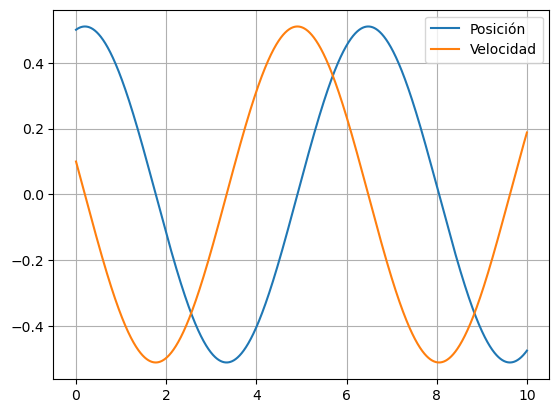

In [3]:
t = np.linspace(0,10,10000)
plt.figure()
plt.plot(t,x(t), label = "Posición")
plt.plot(t,v(t), label = "Velocidad")
plt.legend()
plt.grid()


Y si consideramos un conjunto de frecuencias de oscilación, entonces 

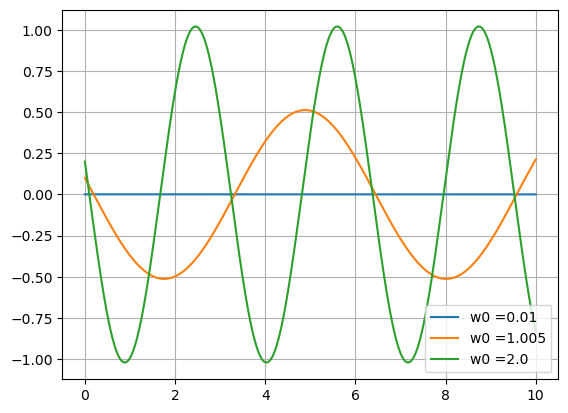

In [8]:
W = np.linspace(0.01,2,3)
t= np.linspace(0,10,10000)

plt.figure()
for w in W:
    w0= w
    plt.plot(t, v(t), label = "w0 =" + str(w0))
plt.legend()
plt.grid()

Si queremos manipular un poco más las cosas, hacemos uso de lo siguiente:

In [19]:
from ipywidgets import *

def grafica(t=0):
    w0 = 1.0
    posicion = x(t)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(posicion,0,"sb",ms=40) #blue square
    ax.plot([-1,1],[-0.02,-0.02],"k",lw=4) #linea negra
    plt.xlim([-1,1])  #limites de x
    plt.ylim([-0.1,0.1]) #limites de y
    

interact(grafica, t=(0,10,0.1))

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

<function __main__.grafica(t=0)>

La opción de arriba generalmente será lenta, así que lo recomendable es usar `interact_manual`. 

In [20]:
interact_manual(grafica, t=(0,10,0.1))

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), Button(description='Run Interact', st…

<function __main__.grafica(t=0)>

___
## Péndulo simple
Ahora, si fijamos nuestra atención al movimiento de un péndulo simple *(oscilaciones pequeñas)* la ecuación diferencial a resolver tiene la misma forma:

\begin{equation}
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta = 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}.
\end{equation}

La diferencia más evidente es como hemos definido a $\omega_{0}$. Esto quiere decir que, 

\begin{equation}
\theta(t) = A\cos(\omega_{0} t) + B\sin(\omega_{0}t)
\end{equation}

Si graficamos la ecuación de arriba vamos a encontrar un comportamiento muy similar al ya discutido anteriormente. Es por ello que ahora veremos el movimiento en el plano $xy$. Es decir, 

\begin{align}
x &= l \sin(\theta), \quad
y = -l \cos(\theta) 
\end{align}

In [29]:
def posicion(t,w0,th0,v0):
    A = th0
    B = v0/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t,w0,th0,v0):
    A = 0.3
    B = 0.5
    return w0(-A*np.cos(w0*t) + B*np.sin(w0*t))


In [44]:
th0= 0
v0 = 1

def grafico_pendulo(t=0, l=1):
    g= 9.81
    w0 = np.sqrt(g/1)
    th = posicion(t,w0,th0,v0)
    
    x = l*np.sin(th)
    y = -l*np.cos(th)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,y,"ob",ms=40) #blue square
    ax.plot([-1.1,1.1],[0,0],"k",lw=4) #línea negra
    ax.plot([0,x],[0,y],"b") #línea azul
    ax.plot(0,0,"xr", ms=20)
    plt.xlim([-1,1])  #limites de x
    plt.ylim([-1.1,0.1]) #limites de y
    
    

In [45]:
interact(grafico_pendulo, t=(0,10,0.1), l = fixed(1))

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

<function __main__.grafico_pendulo(t=0, l=1)>

### Condiciones iniciales 

Realmente lo que se tiene que resolver es, 

\begin{equation}
\theta(t) = \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)
\end{equation}

> **Actividad.** Modificar el programa anterior para incorporar las condiciones iniciales. 

### Plano fase  $(x, \frac{dx}{dt})$

La posición y velocidad para el sistema `masa-resorte` se escriben como: 

\begin{align}
\theta(t) &= x(0) \cos(\omega_{o} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{o} t)\\
\dot{\theta}(t) &= -\omega_{0} \theta (0) \sin(\omega_{0} t) + \dot{\theta}(0)\cos(\omega_{0}t)
\end{align}

In [48]:
from scipy.integrate import solve_ivp

In [49]:
def dX(t,X):
    x = X[0]
    dx = X[1]
    return np.array([dx, -w0**2*x])

In [59]:
l = 1
tspan = [0,10]
x0 = [np.pi/2,0]
sol_pend = solve_ivp(dX, tspan, x0,max_step=0.1)
sol_pend

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 620
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.59053686e-04, 1.74959055e-03, 1.76549592e-02,
       1.17654959e-01, 2.17654959e-01, 3.17654959e-01, 4.17654959e-01,
       5.17654959e-01, 6.17654959e-01, 7.17654959e-01, 8.17654959e-01,
       9.17654959e-01, 1.01765496e+00, 1.11765496e+00, 1.21765496e+00,
       1.31765496e+00, 1.41765496e+00, 1.51765496e+00, 1.61765496e+00,
       1.71765496e+00, 1.81765496e+00, 1.91765496e+00, 2.01765496e+00,
       2.11765496e+00, 2.21765496e+00, 2.31765496e+00, 2.41765496e+00,
       2.51765496e+00, 2.61765496e+00, 2.71765496e+00, 2.81765496e+00,
       2.91765496e+00, 3.01765496e+00, 3.11765496e+00, 3.21765496e+00,
       3.31765496e+00, 3.41765496e+00, 3.51765496e+00, 3.61765496e+00,
       3.71765496e+00, 3.81765496e+00, 3.91765496e+00, 4.01765496e+00,
       4.11765496e+00, 4.21765496e+00, 4

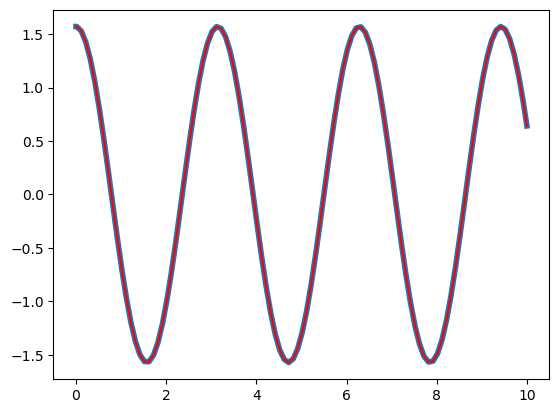

In [60]:
plt.figure()
plt.plot(sol_pend.t,sol_pend.y[0,:],lw=4)
plt.plot(sol_pend.t,posicion(sol_pend.t,w0,np.pi/2,0),"r")

### Multiples condiciones iniciales

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$ para diferentes valores de la energía. 